In [1]:
import json
from pathlib import Path
from itertools import islice
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_dataset(path: Path):
    with open(path, 'r') as data_file:
        for line in data_file:
            yield json.loads(line)
        

In [3]:
data = load_dataset(Path('/Users/linxisarah/amazon_data/Beauty/All_Beauty.json'))
metadata = load_dataset(Path('/Users/linxisarah/amazon_data/Beauty/meta_All_Beauty.json'))

In [4]:
data = pd.DataFrame(data)
metadata = pd.DataFrame(metadata)

In [10]:
merged_data = data.merge(metadata, on='asin')
merged_data = merged_data[(~merged_data.price.isnull()) & (~merged_data.vote.isnull())]
merged_data["timestamp"] = pd.to_datetime(merged_data.unixReviewTime, unit='s')
merged_data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,description,also_view,also_buy,price,similar_item,details,feature,tech1,date,timestamp
19,1.0,True,"11 19, 2016",AMACNEW14ADMX,014789302X,rabiyaa123,it burns your eyes when u put it on and very ...,i do not recommend.,1479513600,3,...,"[A brand-new, unused, unopened, undamaged item...","[B00OWT3W28, B0796RMSV8, B010E1X15K, B010FQJWW...","[B00OWT3W28, B010E1X15K, B0796RMSV8, B07HPBWSW...",$6.45,NaN,NaN,NaN,NaN,NaN,2016-11-19
22,4.0,True,"08 5, 2016",A3CKVF2ZR1CBO0,014789302X,M. Morretti,purchased for vending resale at bellydance wee...,"Nice quality, love the compact packaging",1470355200,5,...,"[A brand-new, unused, unopened, undamaged item...","[B00OWT3W28, B0796RMSV8, B010E1X15K, B010FQJWW...","[B00OWT3W28, B010E1X15K, B0796RMSV8, B07HPBWSW...",$6.45,NaN,NaN,NaN,NaN,NaN,2016-08-05
25,5.0,True,"05 25, 2016",A92AYWTA52KXE,014789302X,Shenia Morris,It goes on very easily and makes my eyes look ...,Five Stars,1464134400,5,...,"[A brand-new, unused, unopened, undamaged item...","[B00OWT3W28, B0796RMSV8, B010E1X15K, B010FQJWW...","[B00OWT3W28, B010E1X15K, B0796RMSV8, B07HPBWSW...",$6.45,NaN,NaN,NaN,NaN,NaN,2016-05-25
26,5.0,True,"03 26, 2016",AR6LNUWXJFYE6,014789302X,Amazon Customer,Letz talk about DRAMA!!,Five Stars,1458950400,2,...,"[A brand-new, unused, unopened, undamaged item...","[B00OWT3W28, B0796RMSV8, B010E1X15K, B010FQJWW...","[B00OWT3W28, B010E1X15K, B0796RMSV8, B07HPBWSW...",$6.45,NaN,NaN,NaN,NaN,NaN,2016-03-26
4845,5.0,False,"06 7, 2013",A2XC4HWUDHEXSX,162209798X,Annette Benda Fox,As an aspiring actor and singer and too infreq...,Square one for living well,1370563200,8,...,[Jessica Wolf's Art of Breathing: Collected Ar...,"[B00OQHHLLY, 0940830000, 1556439709, 080504206...","[1556439709, 1623171970, 0805042067, 158394320...",$12.00,NaN,NaN,NaN,NaN,NaN,2013-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387626,5.0,True,"08 22, 2016",A2E0MYAJ3UIM9W,B01HHZFF32,SanDiGal8585,"By far this is my favorite, I tried cheaper on...",Best,1471824000,5,...,[5 Pairs Pack Disposable Petal Shape Invisible...,NaN,"[B00M9G4ZKY, B0134B8UVW, B00FLNFZHE]",$2.83,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN,NaN,2016-08-22
387629,5.0,True,"08 28, 2017",A2YIA31UJYEM7T,B01HI74BV6,Amazon Customer,"EXCELLENT WATCH ,LOOKS AND FEELS GREAT","EXCELLENT WATCH, LOOKS AND FEELS",1503878400,2,...,NaN,"[B07GP4FT5L, B07MDT2Q46, B07MJ1T5ZR, B07JBTV4P...",NaN,$19.99,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN,NaN,2017-08-28
387630,5.0,True,"08 11, 2017",A2YASRJNZB7QXT,B01HI74BV6,Martin Fire,Great looking watch. Yellow stiching on leath...,Very attractive dress timepiece.,1502409600,3,...,NaN,"[B07GP4FT5L, B07MDT2Q46, B07MJ1T5ZR, B07JBTV4P...",NaN,$19.99,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN,NaN,2017-08-11
387631,4.0,True,"02 20, 2017",ARUDJVO0SA216,B01HI74BV6,Occasional Critic,"This watch, for the very cheap price, is a rid...",Remarkable Value and looks great,1487548800,4,...,NaN,"[B07GP4FT5L, B07MDT2Q46, B07MJ1T5ZR, B07JBTV4P...",NaN,$19.99,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN,NaN,2017-02-20


In [6]:
merged_data.groupby('asin').count()['vote'].sort_values()

asin
B01HJASD20      1
B00E4Y94WS      1
B00E4MNPBQ      1
B00E4MKDSO      1
B016ITDPY4      1
             ... 
B001QY8QXM    227
B00NT0AR7E    231
B000WYJTZG    242
B00W259T7G    312
B00005JS5C    472
Name: vote, Length: 3457, dtype: int64

In [9]:
data_example = merged_data[merged_data.asin=='B00005JS5C'].sort_values('timestamp')
data_example

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,description,also_view,also_buy,price,similar_item,details,feature,tech1,date,timestamp
10066,4.0,False,"09 23, 2001",ADUK7G3H1JMWD,B00005JS5C,Rebecca H. Beaudin,"It won't make you as smooth as a bikini wax, o...",Works well,1001203200,14,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2001-09-23
10067,4.0,False,"09 23, 2001",ADUK7G3H1JMWD,B00005JS5C,Rebecca H. Beaudin,"It won't make you as smooth as a bikini wax, o...",Works well,1001203200,14,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2001-09-23
10064,2.0,False,"04 11, 2002",A12JMZXYC4HI1T,B00005JS5C,Nghiem T. Nguyen,I bought this for my wife because she complain...,"Worked, then died.",1018483200,13,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2002-04-11
10065,2.0,False,"04 11, 2002",A12JMZXYC4HI1T,B00005JS5C,Nghiem T. Nguyen,I bought this for my wife because she complain...,"Worked, then died.",1018483200,13,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2002-04-11
10062,5.0,False,"01 5, 2003",AKNCBLJCOG8HA,B00005JS5C,sinfulkisses,I think some of the past reviewers were confus...,"great bikini ""trimmer""",1041724800,"1,104",...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2003-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148,1.0,True,"04 5, 2018",A9AGL3T37476B,B00005JS5C,Texas Woman,This product was amazing...for the first month...,Defective Product,1522886400,2,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2018-04-05
10145,5.0,True,"04 6, 2018",A20NO0QIXFZLUP,B00005JS5C,Raiya,Just went to re-purchase this trimmer because ...,Just went to re-purchase this trimmer because ...,1522972800,2,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2018-04-06
10144,5.0,True,"04 6, 2018",A20NO0QIXFZLUP,B00005JS5C,Raiya,Just went to re-purchase this trimmer because ...,Just went to re-purchase this trimmer because ...,1522972800,2,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2018-04-06
10109,5.0,True,"04 21, 2018",A2YK95Z5BBX0C3,B00005JS5C,ELM,I've had this trimmer for about 3.5 years now ...,"Amazing shaver, great for cat fur.",1524268800,2,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2018-04-21


/Users/linxisarah/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


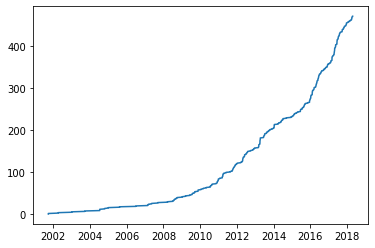

In [8]:
plt.plot(data_example.timestamp, range(data_example.shape[0]))

In [82]:
merged_data[merged_data.asin=='B00005JS5C']

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,description,also_view,also_buy,price,similar_item,details,feature,tech1,date,timestamp
10058,4.0,False,"07 12, 2004",ANKQGTXHREOI5,B00005JS5C,T.L.,"This trimmer is comfortable to hold, which is ...",Good trimmer!,1089590400,35,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2004-07-12
10059,4.0,False,"07 12, 2004",ANKQGTXHREOI5,B00005JS5C,T.L.,"This trimmer is comfortable to hold, which is ...",Good trimmer!,1089590400,35,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2004-07-12
10060,5.0,False,"09 19, 2003",A26LS61FPC8PMZ,B00005JS5C,Kats,I wont' go into the nitty gritty details here....,Neat and Trim,1063929600,40,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2003-09-19
10061,5.0,False,"09 19, 2003",A26LS61FPC8PMZ,B00005JS5C,Kats,I wont' go into the nitty gritty details here....,Neat and Trim,1063929600,40,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2003-09-19
10062,5.0,False,"01 5, 2003",AKNCBLJCOG8HA,B00005JS5C,sinfulkisses,I think some of the past reviewers were confus...,"great bikini ""trimmer""",1041724800,"1,104",...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2003-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14531,5.0,False,"12 30, 2004",A1WH0EW3KERGW9,B00005JS5C,aunt Fred,This trimmer is great! No more red bumps or i...,Excellent trimmer,1104364800,19,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2004-12-30
14532,5.0,True,"10 18, 2004",A19FRW264WZTGP,B00005JS5C,Bunson Honeydew,My wife and I were looking for a workable solu...,Pretty darn close,1098057600,416,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2004-10-18
14533,5.0,True,"10 18, 2004",A19FRW264WZTGP,B00005JS5C,Bunson Honeydew,My wife and I were looking for a workable solu...,Pretty darn close,1098057600,416,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2004-10-18
14534,5.0,False,"07 13, 2004",A8AVKNGY6LFZU,B00005JS5C,L. A. Burns,"It's easy to use, has several setting for diff...",Wish I'd Found This Years Ago!,1089676800,70,...,"[Perfect for sensitive skin types, this bikini...","[B00TYSQXIC, B0018A32XS, B000G0GW6K, B01IX3M3J...",NaN,$18.49,NaN,"\n\n\n\n\n <div class=""disclaim"">Size: <str...",[Bikini shaper and trimmer for women designed ...,NaN,NaN,2004-07-13
